In [1]:
from keras.layers import Input, Dense, LSTM
from keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time

output_dim = 1
batch_size = 256
epochs = 10
seq_len = 5
hidden_size = 128


Using TensorFlow backend.


In [2]:
#panda加载csv文件
data = pd.read_csv('data_stocks.csv')
#删除时间戳列
data.drop('DATE',axis=1,inplace=True)
#将所有数据分成训练集和测试集
data_train = data.iloc[:int(data.shape[0]*0.8),:]
data_test = data.iloc[int(data.shape[0]*0.8):,:]
print(data_train.shape,data_test.shape)

#进行归一化处理
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

X_train = np.array([data_train[i : i + seq_len, 0] for i in
range(data_train.shape[0] - seq_len)])[:, :, np.newaxis]
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
X_test = np.array([data_test[i : i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])[:, :, np.newaxis]
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])



(33012, 501) (8254, 501)


In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33007, 5, 1) (33007,) (8249, 5, 1) (8249,)


In [4]:

X = Input(shape=[X_train.shape[1], X_train.shape[2],])
h = LSTM(hidden_size, activation='relu')(X)
Y = Dense(output_dim, activation='sigmoid')(h)

model = Model(X, Y)
model.compile(loss='mean_squared_error', optimizer='adam')



Epoch 1/10
33007/33007 [==============================] - 3s 90us/step - loss: 0.3187
Epoch 2/10
33007/33007 [==============================] - 2s 62us/step - loss: 0.1064
Epoch 3/10
33007/33007 [==============================] - 2s 61us/step - loss: 0.1041
Epoch 4/10
33007/33007 [==============================] - 2s 62us/step - loss: 0.1028
Epoch 5/10
33007/33007 [==============================] - 2s 63us/step - loss: 0.1023
Epoch 6/10
33007/33007 [==============================] - 2s 63us/step - loss: 0.1021
Epoch 7/10
33007/33007 [==============================] - 2s 63us/step - loss: 0.1021
Epoch 8/10
33007/33007 [==============================] - 2s 62us/step - loss: 0.1021
Epoch 9/10
33007/33007 [==============================] - 2s 62us/step - loss: 0.1020
Epoch 10/10
33007/33007 [==============================] - 1s 21us/step
MSE Train: 0.102170923296
8249/8249 [==============================] - 0s 17us/step
MSE Test: 0.00128715601199


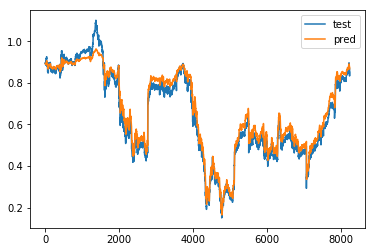

In [5]:
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
shuffle=False)
y_pred = model.predict(X_test)
print('MSE Train:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test:', model.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()
